In [1]:
import json
import numpy 
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import pyarrow
import sys
from tqdm import tqdm
import seaborn as sns
from datetime import date
from dotenv import load_dotenv
from sqlalchemy import create_engine
from os import path
from typing import List,Dict, Tuple
from collections import defaultdict
pd.set_option("display.max_columns", None)

load_dotenv(verbose=True)
BIGQUERY_CREDENTIALS_PATH = os.environ.get('BIGQUERY_CREDENTIALS_PATH')
engine = create_engine('bigquery://bespoke-financial/ProdMetrcData', credentials_path=os.path.expanduser(BIGQUERY_CREDENTIALS_PATH))

sys.path.append(path.realpath(path.join(os.getcwd(), "../core")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../src")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../scripts")))

import create_queries
import prepare_data

from bespoke.inventory.analysis.shared import download_util, inventory_types
from bespoke.inventory.analysis import active_inventory_util as util
from bespoke.inventory.analysis import inventory_valuations_util as valuations_util
from underwriting import msrp_band_analyzer

%load_ext autoreload
%autoreload 2

In [2]:
COMPANY_IDENTIFIER_LIST = [
    'DL',
    'DW',
    'EMA',
    'EMM',
    'EMT',
    'EMF',
    'ST',
    'GRG',
    'EL',
    'VS',
]

In [3]:
mba = msrp_band_analyzer.MSRPBand()

In [4]:
mba.update_company_data(COMPANY_IDENTIFIER_LIST)


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\google\cloud\bigquery\client.py:535: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  warnings.warn(


Verifying download summaries for license C12-0000359-LIC...
Earliest download summary: 2022-01-03
Latest download summary: 2022-03-25

Verifying download summaries for license C9-0000323-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-25

Verifying download summaries for license C10-0000786-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-03-25

Verifying download summaries for license 403-01293...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-25

Verifying download summaries for license 402-00840...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-25

Verifying download summaries for license 402R-00545...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-25

Verifying download summaries for license C10-0000695-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-03-25

Verifying download summaries for license C10-0000774-LIC...
Earliest down

C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:324: SettingWithCopyWarning

### Combining same product categories with different measurements ### 	


C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)


### Breaking down product names into different brands ### 	


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Available combined product category name in costs dataframe ### 	
['buds' 'infused' 'concentrate' 'vape cartridge' 'shake/trim' 'flower'
 'other concentrate' 'edible' 'pre-roll infused' 'pre-roll flower'
 'pre-roll leaf' 'extract' 'topical' 'tincture' 'capsule' 'shake'
 'wet whole plants' 'vape product' 'raw pre-rolls' 'kief' 'seeds'
 'shake/trim allocated for extraction' 'infused butter/oil'
 'infused pre-rolls' 'infused beverage' 'clone - cutting' 'immature plant']
### Available combined product category name in sales dataframe ### 	
['other concentrate' 'buds' 'shake/trim' 'pre-roll flower' 'edible'
 'flower' 'concentrate' 'infused' 'extract' 'vape cartridge'
 'pre-roll infused' 'pre-roll leaf' 'topical' 'immature plants' 'capsule'
 'tincture' 'shake' 'vape product' 'raw pre-rolls' 'kief'
 'shake/trim allocated for extraction' 'infused butter/oil'
 'infused pre-rolls' 'seeds' 'infused beverage' 'clone - cutting']


In [5]:
mba.company_sales_df.adjusted_tx_price_per_unit.isna().sum()

0

In [6]:
mba.company_sales_df.adjusted_tx_price_per_unit.shape

(2250098,)

In [7]:
temp = mba.company_sales_df.copy()

In [8]:
(temp.letter_gram_measure_from_product_name.isna() == False).sum()

1405912

In [9]:
temp.head()

,license_number,receipt_number,rt_type,sales_customer_type,sales_datetime,sales_month,total_packages,rt_total_price,tx_type,tx_package_id,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,tx_price_per_unit,date_in_month,bad_numbers_from_product_name,extracted_units,letter_gram_measure_from_product_name,gram_measure_from_product_name,oz_measure_from_product_name,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category,brand_breakable_by_dash_boolean,brands,brands_by_category
2254737,C10-0000169-LIC,0005181809,inactive,Consumer,2020-01-02 08:16:34+00:00,2020-01,2,33.76,inactive,1782399,1A4060300004D62000000167,VVS - Vape - 0.3g - Gold - Hybrid - GSC,Other Concentrate (weight - each),Each,1.0,16.88,16.88,2020-01,NaN,0.3,0.3g,NaN,NaN,56.266667,0.3,other concentrate,True,VVS,VVS (Other Concentrate (weight - each))
2234648,402-00840,0052954312,inactive,Patient,2020-01-22 13:43:28+00:00,2020-01,3,209.24,inactive,17001160,1A400050026876E100009835,C081 Hit Girl,Concentrate,Grams,5.0,93.00,18.60,2020-01,NaN,NaN,NaN,NaN,NaN,18.600000,1.0,concentrate,False,C081 Hit Girl,C081 Hit Girl
2234649,402R-00545,0052954311,inactive,Consumer,2020-01-22 13:43:23+00:00,2020-01,1,10.03,inactive,18017431,1A400031266EE9B000047163,WR Jenny Kush - 2 Pack Ready Roll,Shake/Trim (by strain),Grams,1.0,10.03,10.03,2020-01,NaN,NaN,NaN,NaN,NaN,10.030000,1.0,shake/trim,True,WR Jenny Kush,WR Jenny Kush (Shake/Trim (by strain))
2234650,C10-0000169-LIC,0007521891,inactive,Consumer,2020-01-22 13:41:39+00:00,2020-01,5,36.58,inactive,1803899,1A4060300004B03000009717,LOL Edibles - Edible - 100mg - Doob Cube - Blu...,Edible (weight - each),Each,1.0,17.22,17.22,2020-01,NaN,0.1,100mg,NaN,NaN,172.200000,0.1,edible,True,LOL Edibles,LOL Edibles (Edible (weight - each))
2234651,C10-0000169-LIC,0007521891,inactive,Consumer,2020-01-22 13:41:39+00:00,2020-01,5,36.58,inactive,1782532,1A4060300004D62000000231,Puffy Delivery - Pre-roll - 0.7g - Jack's Poison,Pre-Roll Flower,Each,1.0,8.68,8.68,2020-01,NaN,0.7,0.7g,NaN,NaN,12.400000,0.7,pre-roll flower,True,Puffy Delivery,Puffy Delivery (Pre-Roll Flower)


In [10]:
((temp.tx_unit_of_measure == 'Each') & (temp.extracted_units.isna() == True) & (temp.measurement_ratio_vs_gram == 1)).sum()

346914

In [11]:
## Coverage %
1 - (299024/1405912)

0.7873095897894036

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.1218984982388502 %
Number of transactions outliers above Boxplot Whisker Maximum is 19.983557876981735 %


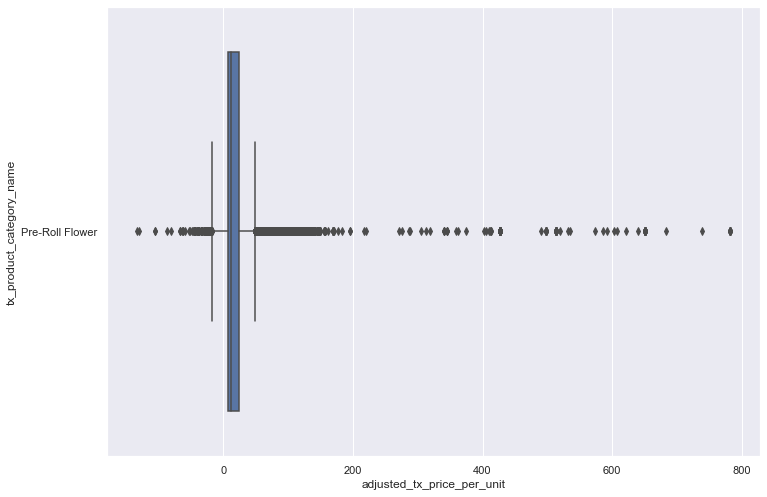

### Checking histogram distribution of MSRP for given tx_product_category_name ### 	
Total number of transactions for Pre-Roll Flower in tx_product_category_name : 112732


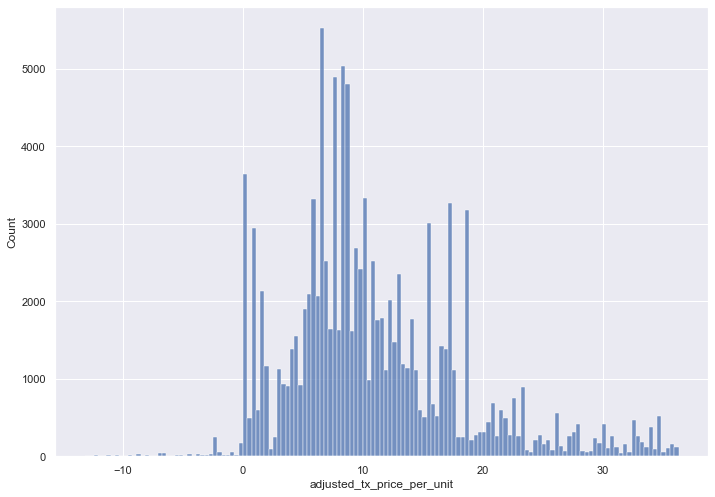

### Outputting summary table ### 	
count    112732.00
mean         10.92
std           7.42
min         -13.17
25%           6.38
50%           9.28
75%          15.00
max          36.31
Name: Pre-Roll Flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
                count   mean   std    min   25%    50%    75%    max
date_in_month                                                       
2020-01        1251.0   9.08  3.55   0.00  6.18   9.34  10.85  35.29
2020-02        1012.0   8.57  2.86   0.00  6.49   8.81   9.79  28.76
2020-03        1423.0   7.92  2.73   0.00  6.79   7.54   8.81  28.88
2020-04        1533.0   7.64  2.34   0.01  6.37   7.49   9.76  17.51
2020-05        1707.0   6.53  2.27   0.00  4.96   6.54   7.49  17.78
2020-06        2440.0   9.08  5.53   0.00  5.89   6.54  11.27  35.73
2020-07        4020.0  11.28  7.20   0.00  5.89   9.28  16.71  36.04
2020-08        4796.0  11.23  7.14   0.00  5.89   7.49  16.70  36.04
2020-09        3974.

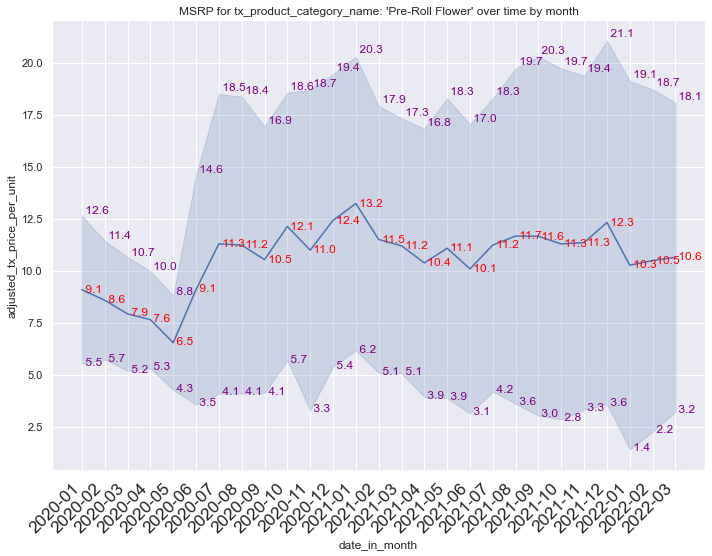

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-01                         5.53                  12.63
2020-02                         5.71                  11.43
2020-03                         5.19                  10.65
2020-04                         5.30                   9.98
2020-05                         4.26                   8.80
2020-06                         3.55                  14.61
2020-07                         4.08                  18.48
2020-08                         4.09                  18.37
2020-09                         4.11                  16.93
2020-10                         5.68                  18.56
2020-11                         3.28                  18.68
2020-12                         5.38                  19.44
2021-01                         6.16                  20.28
2021-02                         5.07                  17.91
2021-03                         5.06    

In [12]:
mba.run_analysis('tx_product_category_name', 'Pre-Roll Flower', 'S')

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 8.096366508688783 %


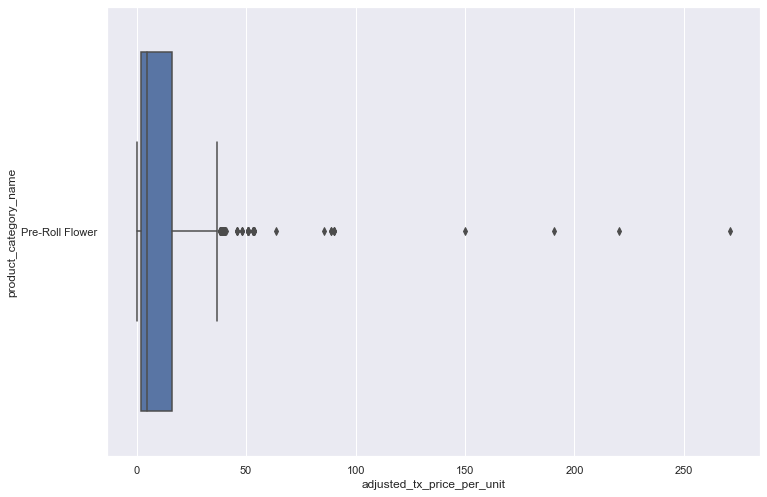

### Checking histogram distribution of MSRP for given product_category_name ### 	
Total number of transactions for Pre-Roll Flower in product_category_name : 4654


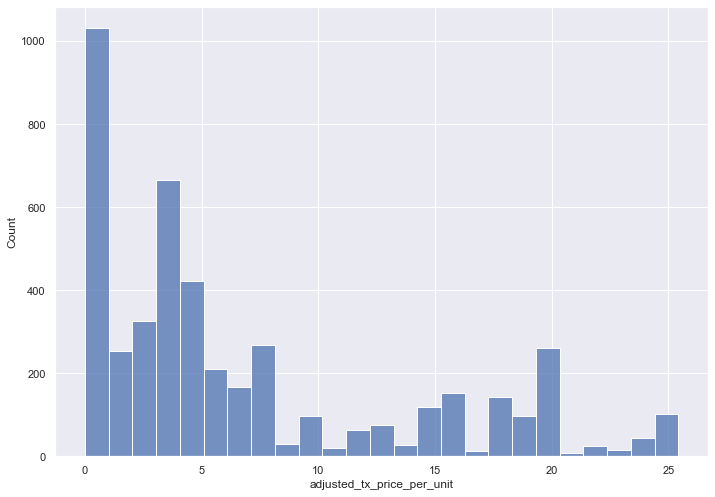

### Outputting summary table ### 	
count    4630.00
mean        7.00
std         7.05
min         0.00
25%         2.00
50%         4.17
75%        10.50
max        25.42
Name: Pre-Roll Flower, dtype: float64
### Outputting summary table by time broken down in months ### 	


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


               count  mean   std   min   25%   50%    75%    max
date_in_month                                                   
2020-01         35.0  2.61  1.97  0.01  1.50  1.88   3.31   8.00
2020-02         21.0  3.64  2.88  0.01  2.50  2.50   3.87  10.00
2020-03         28.0  1.98  1.00  0.00  1.73  2.00   2.45   5.29
2020-04         31.0  1.62  0.96  0.01  1.50  1.81   2.50   2.50
2020-05         34.0  1.67  0.87  0.01  1.50  1.81   2.50   2.50
2020-06        117.0  5.09  6.14  0.01  1.50  2.43   7.50  25.00
2020-07        139.0  5.35  5.64  0.00  1.50  3.75   7.50  22.50
2020-08        184.0  4.18  4.80  0.01  0.08  2.50   5.83  22.00
2020-09        122.0  8.09  7.00  0.00  2.08  6.44  13.97  22.50
2020-10         53.0  8.09  8.15  0.00  2.00  5.50  14.00  25.00
2020-11        107.0  6.01  5.64  0.00  2.60  4.00   6.43  20.00
2020-12         92.0  5.96  6.24  0.00  1.08  4.00   7.50  23.40
2021-01        162.0  6.48  7.49  0.00  0.02  3.75  10.00  25.00
2021-02        128.0  7.2

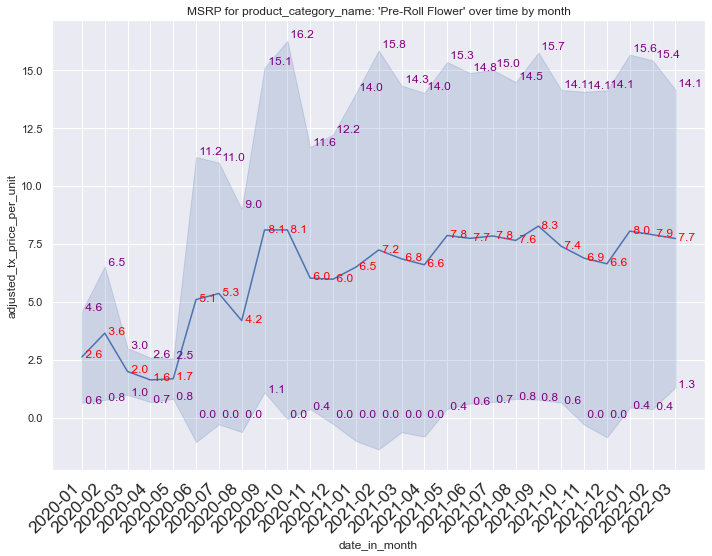

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-01                         0.64                   4.58
2020-02                         0.76                   6.52
2020-03                         0.98                   2.98
2020-04                         0.66                   2.58
2020-05                         0.80                   2.54
2020-06                         0.00                  11.23
2020-07                         0.00                  10.99
2020-08                         0.00                   8.98
2020-09                         1.09                  15.09
2020-10                         0.00                  16.24
2020-11                         0.37                  11.65
2020-12                         0.00                  12.20
2021-01                         0.00                  13.97
2021-02                         0.00                  15.82
2021-03                         0.00    

In [13]:
mba.run_analysis('product_category_name', 'Pre-Roll Flower', 'C')

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.20770236986930954 %
Number of transactions outliers above Boxplot Whisker Maximum is 4.194114804907079 %


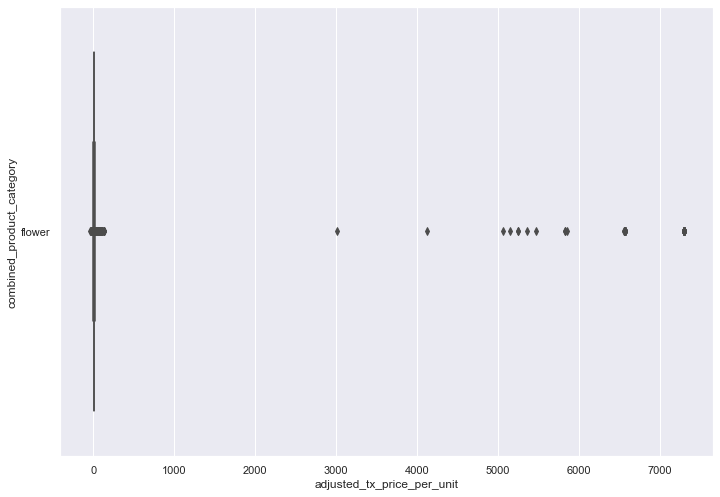

### Checking histogram distribution of MSRP for given combined_product_category ### 	
Total number of transactions for flower in combined_product_category : 324487


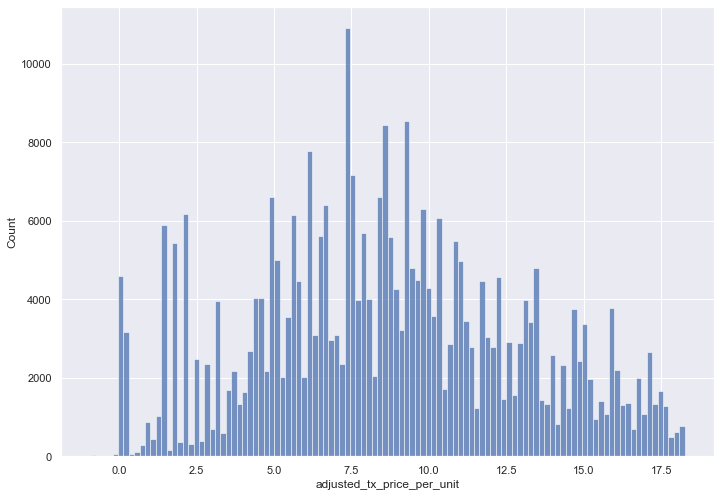

### Outputting summary table ### 	
count    324487.00
mean          8.65
std           4.26
min          -0.91
25%           5.69
50%           8.53
75%          11.70
max          18.25
Name: flower, dtype: float64
### Outputting summary table by time broken down in months ### 	
                 count   mean   std   min   25%    50%    75%    max
date_in_month                                                       
2020-01         3832.0   9.22  3.34  0.00  6.72   8.56  10.91  17.58
2020-02         4221.0   9.40  3.24  0.00  6.96   8.56  11.85  17.58
2020-03         5451.0   9.63  3.11  0.00  7.50   8.88  11.26  17.69
2020-04         5430.0   9.71  3.29  0.00  7.47   9.26  12.54  17.51
2020-05         5993.0   9.92  3.10  0.00  7.84   9.78  11.68  18.25
2020-06         6738.0   9.64  3.28  0.00  7.47   9.25  11.40  18.25
2020-07         7685.0  10.05  3.37  0.00  7.99   9.55  11.93  18.24
2020-08         7316.0   9.98  3.73  0.00  7.46  10.09  12.15  18.25
2020-09         6314.0  10.33

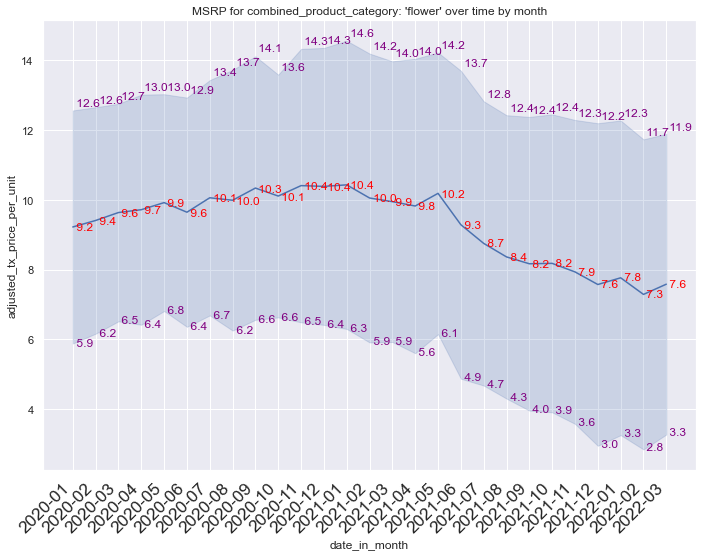

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-01                         5.88                  12.56
2020-02                         6.16                  12.64
2020-03                         6.52                  12.74
2020-04                         6.42                  13.00
2020-05                         6.82                  13.02
2020-06                         6.36                  12.92
2020-07                         6.68                  13.42
2020-08                         6.25                  13.71
2020-09                         6.56                  14.10
2020-10                         6.63                  13.57
2020-11                         6.49                  14.31
2020-12                         6.42                  14.34
2021-01                         6.29                  14.55
2021-02                         5.92                  14.18
2021-03                         5.92    

In [14]:
mba.run_analysis('combined_product_category', 'flower', 'S')

### Outputting boxplot distribution plot and finding outliers outside of Whisksers ### 	
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.9011183522407272 %


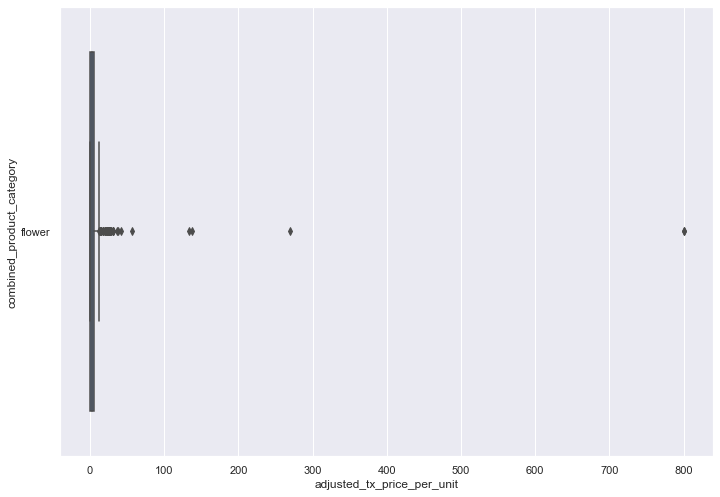

### Checking histogram distribution of MSRP for given combined_product_category ### 	
Total number of transactions for flower in combined_product_category : 12317


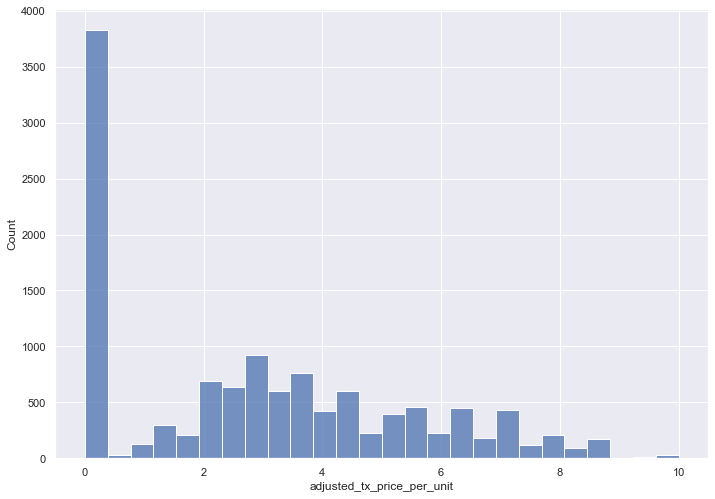

### Outputting summary table ### 	
count    12161.00
mean         2.91
std          2.54
min          0.00
25%          0.01
50%          2.77
75%          4.57
max         10.00
Name: flower, dtype: float64
### Outputting summary table by time broken down in months ### 	


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


               count  mean   std  min   25%   50%   75%    max
date_in_month                                                 
2020-01        164.0  2.89  1.71  0.0  2.26  2.86  3.14   8.57
2020-02        145.0  3.44  1.53  0.0  2.29  2.86  4.00   7.92
2020-03        213.0  3.32  1.67  0.0  2.57  2.86  4.00   8.57
2020-04        198.0  3.62  1.92  0.0  2.71  3.18  4.42  10.00
2020-05        191.0  3.28  1.65  0.0  2.71  3.21  3.71   8.57
2020-06        268.0  3.17  2.24  0.0  1.98  3.14  4.29  10.00
2020-07        240.0  3.25  2.40  0.0  2.06  3.43  4.07  10.00
2020-08        171.0  2.73  2.31  0.0  0.01  3.14  4.07  10.00
2020-09        205.0  3.59  2.49  0.0  2.50  3.29  5.14  10.00
2020-10        246.0  3.69  2.47  0.0  2.29  3.71  5.80   8.57
2020-11        131.0  3.29  3.04  0.0  0.00  2.57  6.16   8.57
2020-12        174.0  3.45  2.80  0.0  0.00  3.48  5.71   8.57
2021-01        355.0  3.26  2.63  0.0  0.00  3.57  5.14   9.80
2021-02        206.0  2.69  2.60  0.0  0.00  2.57  4.71

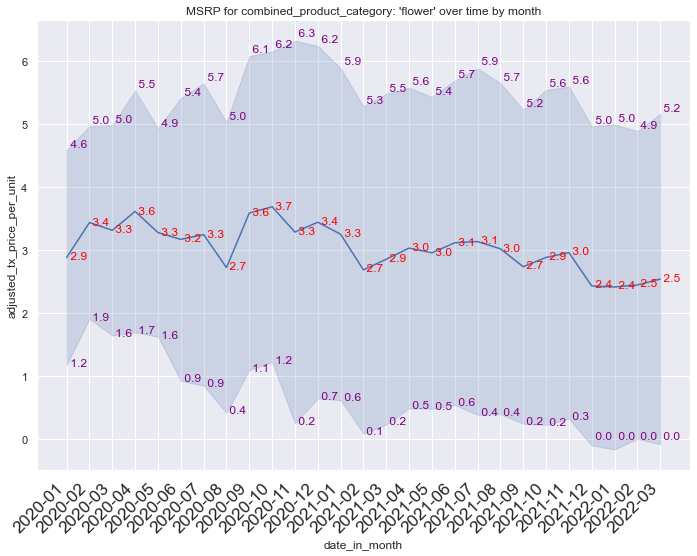

               lower_confidence_band  upper_confidence_band
date_in_month                                              
2020-01                         1.18                   4.60
2020-02                         1.91                   4.97
2020-03                         1.65                   4.99
2020-04                         1.70                   5.54
2020-05                         1.63                   4.93
2020-06                         0.93                   5.41
2020-07                         0.85                   5.65
2020-08                         0.42                   5.04
2020-09                         1.10                   6.08
2020-10                         1.22                   6.16
2020-11                         0.25                   6.33
2020-12                         0.65                   6.25
2021-01                         0.63                   5.89
2021-02                         0.09                   5.29
2021-03                         0.24    

In [15]:
mba.run_analysis('combined_product_category', 'flower', 'C')

In [16]:
combined_median_price = mba.company_sales_df[mba.company_sales_df.combined_product_category == 'flower'].adjusted_tx_price_per_unit.median()

eighth_median_price = mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged eighth - each)'].tx_price_per_unit.median()
quarter_median_price = mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged quarter - each)'].tx_price_per_unit.median()
half_once_median_price = mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged half ounce - each)'].tx_price_per_unit.median()
once_median_price = mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower (packaged ounce - each)'].tx_price_per_unit.median()

In [17]:
combined_median_price_flower_non_labeled = mba.company_sales_df[mba.company_sales_df.tx_product_category_name == 'Flower'].adjusted_tx_price_per_unit.median()


In [18]:
combined_median_price

8.528571428571428

In [19]:
combined_median_price_flower_non_labeled

9.0

In [20]:
eighth_median_price / 3.5

9.331428571428571

In [21]:
quarter_median_price / 7

5.758571428571429

In [22]:
half_once_median_price / 14

3.2142857142857144

In [23]:
once_median_price / 28

1.7857142857142858

In [24]:
mba.company_sales_df[mba.company_sales_df.tx_product_category_name.str.contains('Flower', case = False)][['tx_price_per_unit', 'adjusted_tx_price_per_unit', 'tx_product_category_name']].groupby('tx_product_category_name').describe()

tx_price_per_unit                        \
                                                count       mean        std   
tx_product_category_name                                                      
Flower                                        37380.0   9.343613   3.369417   
Flower (packaged - each)                       3050.0  36.621214  26.495351   
Flower (packaged eighth - each)              215159.0  33.748746  13.853699   
Flower (packaged gram - each)                 10372.0  12.568425  12.482418   
Flower (packaged half ounce - each)           26552.0  57.377086  33.602313   
Flower (packaged ounce - each)                13775.0  65.086650  39.024711   
Flower (packaged quarter - each)              18199.0  46.538909  17.503320   
Pre-Roll Flower                              112732.0  10.985352  10.334897   

                                                                           \
                                       min        25%      50%        75%   
tx_product_category_name                                                    
Flower                                0.00   6.720339   9.0000  11.262857   
Flower (packaged - each)             -3.02  17.020000  38.4350  51.170000   
Flower (packaged eighth - each)      -3.12  25.055000  32.6600  42.940000   
Flower (packaged gram - each)        -0.76   4.320000   9.9225  15.780000   
Flower (packaged half ounce - each) -12.51  30.000000  45.0000  75.027500   
Flower (packaged ounce - each)      -20.07  40.000000  50.0000  70.000000   
Flower (packaged quarter - each)     -5.88  34.045000  40.3100  57.910000   
Pre-Roll Flower                     -29.58   5.230000   8.4400  13.130000   

                                                adjusted_tx_price_per_unit  \
                                            max                      count   
tx_product_category_name                                                     
Flower                                18.254286                    37380.0   
Flower (packaged - each)             165.000000                     3050.0   
Flower (packaged eighth - each)       63.890000                   215159.0   
Flower (packaged gram - each)         66.650000                    10372.0   
Flower (packaged half ounce - each)  234.710000                    26552.0   
Flower (packaged ounce - each)       360.400000                    13775.0   
Flower (packaged quarter - each)     115.000000                    18199.0   
Pre-Roll Flower                      184.690000                   112732.0   

                                                                               \
                                          mean       std        min       25%   
tx_product_category_name                                                        
Flower                                9.343613  3.369417   0.000000  6.720339   
Flower (packaged - each)              9.466897  5.196130  -0.910000  6.133214   
Flower (packaged eighth - each)       9.642499  3.958200  -0.891429  7.158571   
Flower (packaged gram - each)         9.003056  5.580908  -0.760000  4.320000   
Flower (packaged half ounce - each)   4.098363  2.400165  -0.893571  2.142857   
Flower (packaged ounce - each)        2.324523  1.393740  -0.716786  1.428571   
Flower (packaged quarter - each)      6.648416  2.500474  -0.840000  4.863571   
Pre-Roll Flower                      10.919449  7.420886 -13.173333  6.380000   

                                                                      
                                           50%        75%        max  
tx_product_category_name                                              
Flower                                9.000000  11.262857  18.254286  
Flower (packaged - each)             10.022222  13.611174  18.211864  
Flower (packaged eighth - each)       9.331429  12.268571  18.254286  
Flower (packaged gram - each)         9.630000  13.760000  18.240000  
Flower (packaged half ounce - each)   3.214286   5.359107  16.765000  

We see that adjusted_price is overall on a smaller scale than tx_price_per_unit due to units being converted down to grams. 

In [15]:
mba.output_time_series_metadata()

In [32]:
mba.save()

In [5]:
import pickle
picklefile = open('msrp_band_analyzer_training_object', 'rb')
old_mba = pickle.load(picklefile)

In [6]:
old_mba['company_sales_df'].head()

,license_number,receipt_number,rt_type,sales_customer_type,sales_datetime,sales_month,total_packages,rt_total_price,tx_type,tx_package_id,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,tx_price_per_unit,date_in_month,bad_numbers_from_product_name,extracted_units,letter_gram_measure_from_product_name,gram_measure_from_product_name,oz_measure_from_product_name,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category,brand_breakable_by_dash_boolean,brands,brands_by_category
2254737,C10-0000169-LIC,0005181809,inactive,Consumer,2020-01-02 08:16:34+00:00,2020-01,2,33.76,inactive,1782399,1A4060300004D62000000167,VVS - Vape - 0.3g - Gold - Hybrid - GSC,Other Concentrate (weight - each),Each,1.0,16.88,16.88,2020-01,NaN,0.3,0.3g,NaN,NaN,56.266667,0.3,other concentrate,True,VVS,VVS (Other Concentrate (weight - each))
2234648,402-00840,0052954312,inactive,Patient,2020-01-22 13:43:28+00:00,2020-01,3,209.24,inactive,17001160,1A400050026876E100009835,C081 Hit Girl,Concentrate,Grams,5.0,93.00,18.60,2020-01,NaN,NaN,NaN,NaN,NaN,18.600000,1.0,concentrate,False,C081 Hit Girl,C081 Hit Girl
2234649,402R-00545,0052954311,inactive,Consumer,2020-01-22 13:43:23+00:00,2020-01,1,10.03,inactive,18017431,1A400031266EE9B000047163,WR Jenny Kush - 2 Pack Ready Roll,Shake/Trim (by strain),Grams,1.0,10.03,10.03,2020-01,NaN,NaN,NaN,NaN,NaN,10.030000,1.0,shake/trim,True,WR Jenny Kush,WR Jenny Kush (Shake/Trim (by strain))
2234650,C10-0000169-LIC,0007521891,inactive,Consumer,2020-01-22 13:41:39+00:00,2020-01,5,36.58,inactive,1803899,1A4060300004B03000009717,LOL Edibles - Edible - 100mg - Doob Cube - Blu...,Edible (weight - each),Each,1.0,17.22,17.22,2020-01,NaN,0.1,100mg,NaN,NaN,172.200000,0.1,edible,True,LOL Edibles,LOL Edibles (Edible (weight - each))
2234651,C10-0000169-LIC,0007521891,inactive,Consumer,2020-01-22 13:41:39+00:00,2020-01,5,36.58,inactive,1782532,1A4060300004D62000000231,Puffy Delivery - Pre-roll - 0.7g - Jack's Poison,Pre-Roll Flower,Each,1.0,8.68,8.68,2020-01,NaN,0.7,0.7g,NaN,NaN,12.400000,0.7,pre-roll flower,True,Puffy Delivery,Puffy Delivery (Pre-Roll Flower)


In [7]:
new_mba = msrp_band_analyzer.MSRPBand(company_costs_df = old_mba['company_costs_df'], company_sales_df = old_mba['company_sales_df'])

In [8]:
new_mba.company_sales_df.head()

,license_number,receipt_number,rt_type,sales_customer_type,sales_datetime,sales_month,total_packages,rt_total_price,tx_type,tx_package_id,tx_package_label,tx_product_name,tx_product_category_name,tx_unit_of_measure,tx_quantity_sold,tx_total_price,tx_price_per_unit,date_in_month,bad_numbers_from_product_name,extracted_units,letter_gram_measure_from_product_name,gram_measure_from_product_name,oz_measure_from_product_name,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category,brand_breakable_by_dash_boolean,brands,brands_by_category
2254737,C10-0000169-LIC,0005181809,inactive,Consumer,2020-01-02 08:16:34+00:00,2020-01,2,33.76,inactive,1782399,1A4060300004D62000000167,VVS - Vape - 0.3g - Gold - Hybrid - GSC,Other Concentrate (weight - each),Each,1.0,16.88,16.88,2020-01,NaN,0.3,0.3g,NaN,NaN,56.266667,0.3,other concentrate,True,VVS,VVS (Other Concentrate (weight - each))
2234648,402-00840,0052954312,inactive,Patient,2020-01-22 13:43:28+00:00,2020-01,3,209.24,inactive,17001160,1A400050026876E100009835,C081 Hit Girl,Concentrate,Grams,5.0,93.00,18.60,2020-01,NaN,NaN,NaN,NaN,NaN,18.600000,1.0,concentrate,False,C081 Hit Girl,C081 Hit Girl
2234649,402R-00545,0052954311,inactive,Consumer,2020-01-22 13:43:23+00:00,2020-01,1,10.03,inactive,18017431,1A400031266EE9B000047163,WR Jenny Kush - 2 Pack Ready Roll,Shake/Trim (by strain),Grams,1.0,10.03,10.03,2020-01,NaN,NaN,NaN,NaN,NaN,10.030000,1.0,shake/trim,True,WR Jenny Kush,WR Jenny Kush (Shake/Trim (by strain))
2234650,C10-0000169-LIC,0007521891,inactive,Consumer,2020-01-22 13:41:39+00:00,2020-01,5,36.58,inactive,1803899,1A4060300004B03000009717,LOL Edibles - Edible - 100mg - Doob Cube - Blu...,Edible (weight - each),Each,1.0,17.22,17.22,2020-01,NaN,0.1,100mg,NaN,NaN,172.200000,0.1,edible,True,LOL Edibles,LOL Edibles (Edible (weight - each))
2234651,C10-0000169-LIC,0007521891,inactive,Consumer,2020-01-22 13:41:39+00:00,2020-01,5,36.58,inactive,1782532,1A4060300004D62000000231,Puffy Delivery - Pre-roll - 0.7g - Jack's Poison,Pre-Roll Flower,Each,1.0,8.68,8.68,2020-01,NaN,0.7,0.7g,NaN,NaN,12.400000,0.7,pre-roll flower,True,Puffy Delivery,Puffy Delivery (Pre-Roll Flower)


# Testing

In [22]:
from underwriting import msrp_band_analyzer_testing


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\google\cloud\bigquery\client.py:535: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  warnings.warn(


Verifying download summaries for license CCL18-0000591...
Earliest download summary: 2021-01-01
Latest download summary: 2022-03-25

Verifying download summaries for license C11-0000985-LIC...
Earliest download summary: 2021-01-01
Latest download summary: 2022-03-25

Verifying download summaries for license CDPH-10003269...
Earliest download summary: 2021-01-01
Latest download summary: 2022-03-25

Verifying download summaries for license C9-0000247-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-03-25

Verifying download summaries for license C9-0000451-LIC...
Earliest download summary: 2021-01-01
Latest download summary: 2022-03-25
Found bad download summary for license C9-0000451-LIC on date 2022-03-07

Verifying download summaries for license 402R-00804...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-25

Verifying download summaries for license C10-0000414-LIC...
Earliest download summary: 2021-01-01
Latest download summary: 2022-

C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['extracted_units'][idx] = df[measure_column][idx].apply(mba_util.EXTRACTED_MEASUREMENT_COLUMNS[measure_column])
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:324: SettingWithCopyWarning

### Combining same product categories with different measurements ### 	


C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)


### Breaking down product names into different brands ### 	


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Available combined product category name in costs dataframe ### 	
['flower' 'pre-roll flower' 'edible' 'vape cartridge' 'extract'
 'other concentrate' 'tincture' 'pre-roll infused' 'capsule' 'topical'
 'pre-roll leaf' 'seeds' 'shake' 'infused' 'concentrate' 'buds'
 'bud allocated for extraction' 'shake/trim' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['vape cartridge' 'other concentrate' 'flower' 'extract' 'pre-roll flower'
 'tincture' 'edible' 'pre-roll infused' 'topical' 'capsule'
 'pre-roll leaf' 'seeds' 'shake' 'buds' 'infused'
 'bud allocated for extraction' 'concentrate' 'shake/trim'
 'infused butter/oil']


In [ ]:
result = msrp_band_analyzer_testing.run_test_set_analysis('product_category_name', 'Flower', 'C')

In [28]:
result[0]

,delivery_type,license_number,manifest_number,created_date,received_datetime,shipment_transaction_type,shipper_facility_license_number,shipper_facility_name,recipient_facility_license_number,recipient_facility_name,shipment_type_name,shipment_transaction_type_1,package_id,package_label,type,source_package_labels,source_harvest_names,shipment_package_state,is_testing_sample,is_trade_sample,product_category_name,product_name,package_lab_results_status,shipper_wholesale_price,shipped_quantity,shipped_unit_of_measure,receiver_wholesale_price,received_quantity,received_unit_of_measure,receiver_wholesale_price_1,item_unit_weight,item_unit_weight_unit_of_measure_name,tx_price_per_unit,date_in_month,bad_numbers_from_product_name,extracted_units,letter_gram_measure_from_product_name,gram_measure_from_product_name,oz_measure_from_product_name,adjusted_tx_price_per_unit,measurement_ratio_vs_gram,combined_product_category,brand_breakable_by_dash_boolean,brands,brands_by_category
28900,INCOMING_FROM_VENDOR,C9-0000247-LIC,0000276839,2020-01-24,2020-01-30 19:38:51+00:00,Wholesale,C11-0000559-LIC,CONNECTED MANAGEMENT LLC,C9-0000247-LIC,"LUMALIGN, LLC",Wholesale Manifest,Wholesale,1672402,1A4060300007406000001230,transfer,1A4060300007406000004708,,Accepted,False,False,Flower,Indoor - Connected - Quarter Smalls Case (32) ...,failed,1344.00,224.0,Grams,1344.00,224.0,Grams,1344.00,NaN,None,6.000000,2020-01,NaN,NaN,NaN,NaN,NaN,6.000000,1.0,flower,True,Indoor,Indoor (Flower)
28901,INCOMING_FROM_VENDOR,C9-0000247-LIC,0000276839,2020-01-24,2020-01-30 19:38:51+00:00,Wholesale,C11-0000559-LIC,CONNECTED MANAGEMENT LLC,C9-0000247-LIC,"LUMALIGN, LLC",Wholesale Manifest,Wholesale,2248750,1A4060300007406000008650,transfer,1A4060300007406000001620,,Accepted,False,False,Flower,Indoor - Connected - Gram Case (20) - Biscotti,failed,0.20,20.0,Grams,0.20,20.0,Grams,0.20,NaN,None,0.010000,2020-01,NaN,NaN,NaN,Gram,NaN,0.010000,1.0,flower,True,Indoor,Indoor (Flower)
28902,INCOMING_FROM_VENDOR,C9-0000247-LIC,0000276839,2020-01-24,2020-01-30 19:38:51+00:00,Wholesale,C11-0000559-LIC,CONNECTED MANAGEMENT LLC,C9-0000247-LIC,"LUMALIGN, LLC",Wholesale Manifest,Wholesale,2248740,1A4060300007406000008649,transfer,1A4060300009FE9000003936,,Accepted,False,False,Flower,Outdoor - Connected - Eighth - N'ice Cream,failed,480.48,112.0,Grams,480.48,112.0,Grams,480.48,NaN,None,4.290000,2020-01,NaN,NaN,NaN,NaN,NaN,4.290000,1.0,flower,True,Outdoor,Outdoor (Flower)
28897,INCOMING_FROM_VENDOR,C9-0000247-LIC,0000276839,2020-01-24,2020-01-30 19:38:51+00:00,Wholesale,C11-0000559-LIC,CONNECTED MANAGEMENT LLC,C9-0000247-LIC,"LUMALIGN, LLC",Wholesale Manifest,Wholesale,2248754,1A4060300007406000008651,transfer,1A4060300007406000001145,,Accepted,False,False,Flower,Indoor - Connected - Gram Case (20) - Gushers,failed,0.20,20.0,Grams,0.20,20.0,Grams,0.20,NaN,None,0.010000,2020-01,NaN,NaN,NaN,Gram,NaN,0.010000,1.0,flower,True,Indoor,Indoor (Flower)
28896,INCOMING_FROM_VENDOR,C9-0000247-LIC,0000276839,2020-01-24,2020-01-30 19:38:51+00:00,Wholesale,C11-0000559-LIC,CONNECTED MANAGEMENT LLC,C9-0000247-LIC,"LUMALIGN, LLC",Wholesale Manifest,Wholesale,2248783,1A4060300007406000008655,transfer,1A4060300007406000001598,88-01-102119-GEL,Accepted,False,False,Flower,Indoor - Connected - Eighth Case (32) - Gelonade,failed,1039.92,112.0,Grams,1039.92,112.0,Grams,1039.92,NaN,None,9.285000,2020-01,NaN,NaN,NaN,NaN,NaN,9.285000,1.0,flower,True,Indoor,Indoor (Flower)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25248,INCOMING_FROM_VENDOR,C10-0000414-LIC,0001230096,2020-11-11,2020-11-13 16:37:51+00:00,None,C11-0000032-LIC,CI DISTRIBUTION LLC,C10-0000414-LIC,"GREENHOUSE HERBAL CENTER, LLC",Wholesale Manifest,Wholesale,9298212,1A406030000326B000037749,transfer,1A406030000326B000036565,"H209 - SSH, H209 - Super Silver Haze, H210 - S...",Accepted,False,False,Flower,Claybourne Power P

In [29]:
result[1]

delivery_type                            INCOMING_FROM_VENDORINCOMING_FROM_VENDORINCOMI...
license_number                           C9-0000247-LICC9-0000247-LICC9-0000247-LICC9-0...
manifest_number                          0000276839000027683900002768390000276839000027...
shipper_facility_license_number          C11-0000559-LICC11-0000559-LICC11-0000559-LICC...
shipper_facility_name                    CONNECTED MANAGEMENT LLCCONNECTED MANAGEMENT L...
recipient_facility_license_number        C9-0000247-LICC9-0000247-LICC9-0000247-LICC9-0...
recipient_facility_name                  LUMALIGN, LLCLUMALIGN, LLCLUMALIGN, LLCLUMALIG...
shipment_type_name                       Wholesale ManifestWholesale ManifestWholesale ...
shipment_transaction_type_1              WholesaleWholesaleWholesaleWholesaleWholesaleW...
package_id                               1672402224875022487402248754224878322487292286...
package_label                            1A40603000074060000012301A40603000074060000086...

In [ ]:
result = run_test_set_analysis('tx_product_category_name', 'Pre-Roll Flower', 'S')